<a href="https://colab.research.google.com/github/brijeshpee/Data-Science---Databases/blob/main/Churn%20Model%20Using%20ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a step-by-step guide on Artificial Neural Networks (ANN). Along the way, I added some helpful notes to clarify things.

# **Overview of the dataset (used in this kernel)**

Based on numerous information about each customer, a bank attempts to predict whether or not consumers would leave the bank. Credit Score, Gender, Balance, and so on are examples of these qualities. (Please see the dataset view below.) We will use ANN to uncover significant connections between these independent variables in order to predict whether a customer will depart or remain with the bank.

In [2]:
!pip install tensorflow_gpu

     |████████████████████████████████| 497.5 MB 25 kB/s 
     |████████████████████████████████| 462 kB 47.8 MB/s 


In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.8.0


In [4]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [23]:
#Creating Independent and Dependent Features
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [24]:
#Create dummy variables (One-Hot Encoding)
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)


In [25]:
## Concatenate the Data Frames
X=pd.concat([X,geography,gender],axis=1)


In [26]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [27]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [32]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_train.shape)

[[ 0.16958176 -0.46460796  0.00666099 ... -0.5698444   1.74309049
  -1.09168714]
 [-2.30455945  0.30102557 -1.37744033 ...  1.75486502 -0.57369368
   0.91601335]
 [-1.19119591 -0.94312892 -1.031415   ... -0.5698444  -0.57369368
  -1.09168714]
 ...
 [ 0.9015152  -0.36890377  0.00666099 ... -0.5698444  -0.57369368
   0.91601335]
 [-0.62420521 -0.08179119  1.39076231 ... -0.5698444   1.74309049
  -1.09168714]
 [-0.28401079  0.87525072 -1.37744033 ...  1.75486502 -0.57369368
  -1.09168714]]
(8000, 11)


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [35]:
# Initialising the ANN
classifier = Sequential()

In [40]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=11,activation='relu'))

In [52]:
# Adding the first hidden layer
classifier.add(Dense(units=4,activation='relu'))

In [53]:
# Adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [54]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [55]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50)

Epoch 1/50
536/536 [==============================] - 3s 4ms/step - loss: 0.5703 - accuracy: 0.8393 - val_loss: 0.4846 - val_accuracy: 0.8493
Epoch 2/50
536/536 [==============================] - 2s 4ms/step - loss: 0.4201 - accuracy: 0.8645 - val_loss: 0.3995 - val_accuracy: 0.8542
Epoch 3/50
536/536 [==============================] - 2s 4ms/step - loss: 0.3679 - accuracy: 0.8673 - val_loss: 0.3781 - val_accuracy: 0.8527
Epoch 4/50
536/536 [==============================] - 2s 4ms/step - loss: 0.3527 - accuracy: 0.8643 - val_loss: 0.3769 - val_accuracy: 0.8523
Epoch 5/50
536/536 [==============================] - 2s 4ms/step - loss: 0.3458 - accuracy: 0.8627 - val_loss: 0.3725 - val_accuracy: 0.8478
Epoch 6/50
536/536 [==============================] - 2s 4ms/step - loss: 0.3417 - accuracy: 0.8610 - val_loss: 0.3722 - val_accuracy: 0.8523
Epoch 7/50
536/536 [==============================] - 2s 4ms/step - loss: 0.3398 - accuracy: 0.8638 - val_loss: 0.3694 - val_accuracy: 0.8489
Epoch 

In [45]:
# list all data in history
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


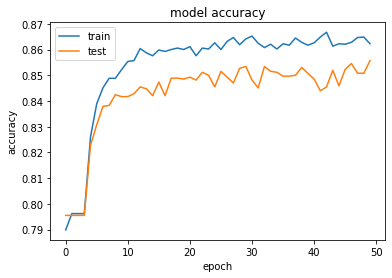

In [46]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

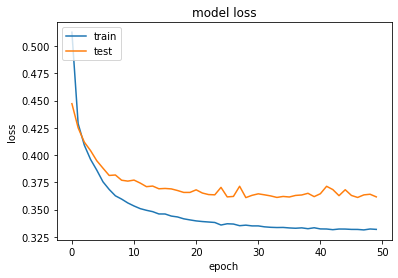

In [47]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [48]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [49]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1521,   74],
       [ 206,  199]])

In [51]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.86